In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy.stats as sts
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

Коэффициент корреляции Пирсона:  -0.9999999999999998


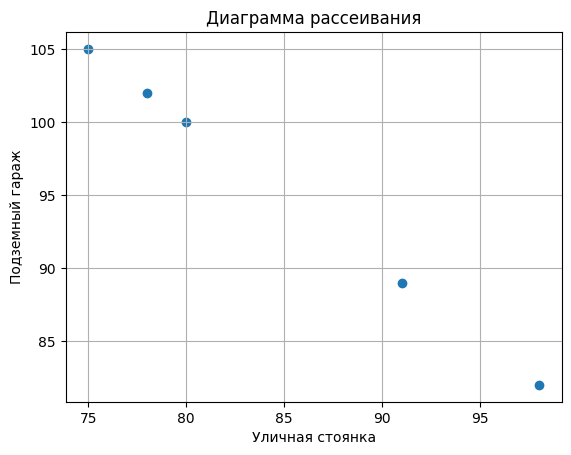

In [24]:
#1 2
street = [80, 98, 75, 91, 78]
garage = [100, 82, 105, 89, 102]

correlation = np.corrcoef(street, garage)[0, 1]
print('Коэффициент корреляции Пирсона: ', correlation)
# сильная отрицательная корлеяция

plt.grid()
plt.scatter(street, garage)
plt.xlabel('Уличная стоянка')
plt.ylabel('Подземный гараж')
plt.title('Диаграмма рассеивания')
plt.show()





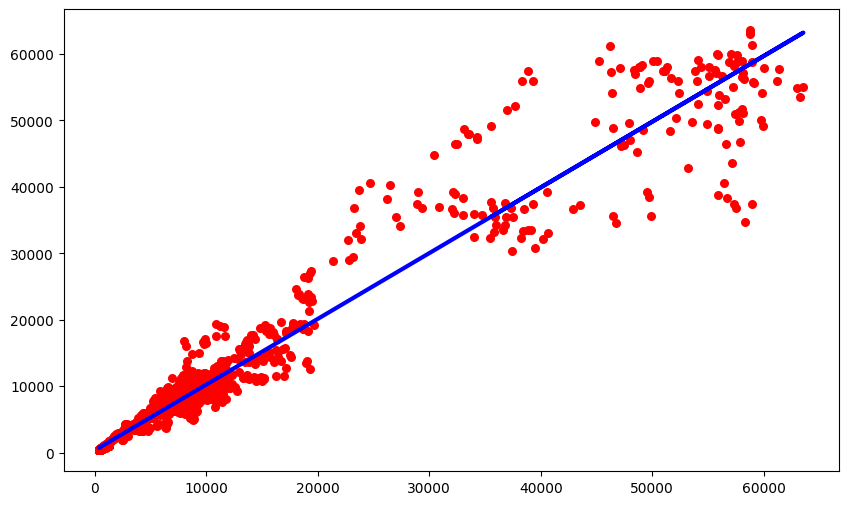

Наклон прямой:  0.9889372943721854
Y-перехват:  354.08558180726686
Прогноз на  1987 день:  34582.77
Прогноз на  1988 день:  35622.15
Прогноз на  1989 день:  37232.38
Прогноз на  1990 день:  36631.78
Прогноз на  1991 день:  37515.36
Прогноз на  1992 день:  39149.76
Прогноз на  1993 день:  36807.8
Прогноз на  1994 день:  35499.33
Прогноз на  1995 день:  35756.63
Прогноз на  1996 день:  33565.43
Прогноз на  1997 день:  33393.87
Прогноз на  1998 день:  37332.01
Прогноз на  1999 день:  36629.08
Прогноз на  2000 день:  36789.83


In [33]:
#3-7
data = pd.read_csv('bitcoin.csv', sep=',')
projection = 14
data['predict'] = data['close'].shift(-projection)
X = pd.DataFrame(data['close'])
y = pd.DataFrame(data['predict'])
X = np.array(X, type(float))
y = np.array(y, type(float))
x_predict = X[-projection:]
X = X[:-projection]
y = y[:-projection]
regression = LinearRegression()
regression.fit(X, y)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', marker='o', s=30)
plt.plot(X, regression.predict(X), color='blue', linewidth=3)
plt.show()
print('Наклон прямой: ', regression.coef_[0][0])
print('Y-перехват: ', regression.intercept_[0])
for i in range(1, 15):
    print('Прогноз на ', len(X)-1+i, 'день: ', round((regression.coef_[0]*x_predict[i-1]+regression.intercept_[0])[0],2))





In [26]:
#8-9
data = pd.read_csv('housePrice.csv', sep=',')

data['Area'] = pd.to_numeric(data['Area'], errors = 'coerce')
data.dropna(inplace = True)
print(data.isna().sum())
data.describe()


Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64


,Area,Room,Price,Price(USD)
count,3450.000000,3450.000000,3.450000e+03,3.450000e+03
mean,106.917391,2.081159,5.375563e+09,1.791854e+05
std,69.550976,0.760216,8.125918e+09,2.708639e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.419250e+09,4.730833e+04
50%,90.000000,2.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,9.240000e+10,3.080000e+06


In [27]:
# 10

X = data['Area'].astype(float)
y = data['Price(USD)'].astype(float)
n = np.size(X)

SS_xy = np.sum(X*y) - n*np.mean(X)*np.mean(y) # прекрёстное отклонение
SS_xx = np.sum(X*X) - n*np.mean(X)*np.mean(X) # отклонение по X

b1 = SS_xy/SS_xx  # коэффициент регрессии
b0 = np.mean(y) - b1*np.mean(X)

In [28]:
# 11
print('Наклон прямой: ', b1)
print('Y-перехват: ', b0)

Наклон прямой:  2814.1831671205364
Y-перехват:  -121699.70253620771


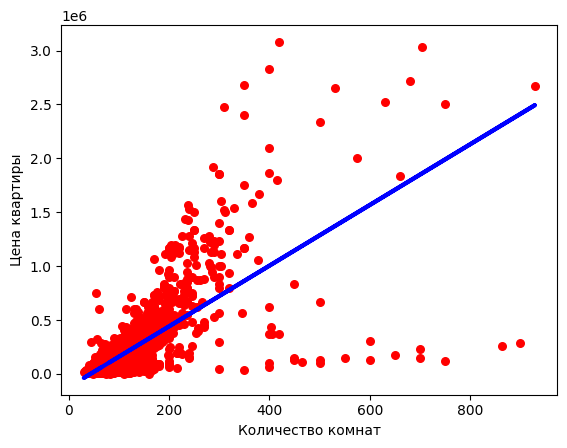

In [29]:
# 12
plt.scatter(X, y, color='red', marker='o', s=30)
y_pred = b0 + b1*X # прогнозируемый вектор
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.xlabel('Количество комнат')
plt.ylabel('Цена квартиры')
plt.show()